In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
import os
import matplotlib.pyplot as plt


In [13]:
standard_genetic_code = {
        'Ala': ['GCT', 'GCC', 'GCA', 'GCG'],
        'Arg': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
        'Asn': ['AAT', 'AAC'],
        'Asp': ['GAT', 'GAC'],
        'Cys': ['TGT', 'TGC'],
        'Gln': ['CAA', 'CAG'],
        'Glu': ['GAA', 'GAG'],
        'Gly': ['GGT', 'GGC', 'GGA', 'GGG'],
        'His': ['CAT', 'CAC'],
        'Ile': ['ATT', 'ATC', 'ATA'],
        'Leu': ['CTT', 'CTC', 'CTA', 'CTG', 'TTA', 'TTG'],
        'Lys': ['AAA', 'AAG'],
        'Met': ['ATG'],
        'Phe': ['TTT', 'TTC'],
        'Pro': ['CCT', 'CCC', 'CCA', 'CCG'],
        'Ser': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
        'Thr': ['ACT', 'ACC', 'ACA', 'ACG'],
        'Trp': ['TGG'],
        'Tyr': ['TAT', 'TAC'],
        'Val': ['GTT', 'GTC', 'GTA', 'GTG'],
        'Stop': ['TAA', 'TAG', 'TGA']
    }


In [9]:
APMV_cds_list = list(SeqIO.parse("../APMV/APMV_coding_nt.fna", "fasta"))
str(APMV_cds_list[0].seq)

'ATGACTTATGTCAAAAAATATCATCCTACCACTAAATATTATGGTATTATTCATGGTGAAAAGTATGAATTACAAGACGTTTTATTTTACAGTTTTAATTACTCTAATAGAGAAGAAGTATGTCCAATTAGTGGTACTGCACATAAATCCAACGGATTTTATGTAATTGAAACCAGTAAAGGATACTTTATGAAATGCCATTCTGATAAATGTAAGAATAAAAAAGCCAAATATCTAGGTCCAGCTGATGCGACAGATATGTTTGTTAAATGTGCCAATCAAATTGATCAACAATACCTGATTATGAAAGGAGGAATTGCCGATGCTCCTAAAGAACCAGTTAAAGATATCATTATCAATTGGTTATCCAATGATAAAATTAAAACGTTGGCTGTTCGATCTCCAATGGGAACTGGAAAGACAACCATGATCAAAAAAATTCTTGATCATTATGACAATATCAAAAAAATATTATGGATATCTCATAGACAAACTTTATCCAAACAAATTTACGGATCTTTCAAAAATCACGGATTTGTTAATTACATGGATCAAAAAGGTAATCTGTTCGAACATGATAGACTTATTATTCAGATTGATAGTTTAAAAAGGATTTTTAAATACGACAAAGATTATAATACTGTATTTAAACAGTATGATTTGGTTATTATTGATGAGATCGAAGGGAACATGAATCATTTTATGAGTCCATATTTGAGAAAAGATTCTGATTTTTCTGTCAGACAAACTTTTCAGAAAATGTTGAATTGTATTGATACTGCTAAGAAACTACTAGTATTAGATGCCGATTTAGGAATGAGAAGTAAATTGTTTATTGATAATTTCGGTAAATCTATTGTCGTCAATAATAATTATAAACCTATCCAGAAGATTTTTGAGATTACTAATGATCTCTCTAGTTTTCAAGAAATTCTTCTAGCCGATATTAAAGATGGTAAAAATGTTTGTGTTGTTTCTATGTCAGCATCTTACTTGGAT

In [111]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import random

standard_genetic_code = {
        'A': ['GCT', 'GCC', 'GCA', 'GCG'],
        'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
        'N': ['AAT', 'AAC'],
        'D': ['GAT', 'GAC'],
        'C': ['TGT', 'TGC'],
        'Q': ['CAA', 'CAG'],
        'E': ['GAA', 'GAG'],
        'G': ['GGT', 'GGC', 'GGA', 'GGG'],
        'H': ['CAT', 'CAC'],
        'I': ['ATT', 'ATC', 'ATA'],
        'L': ['CTT', 'CTC', 'CTA', 'CTG', 'TTA', 'TTG'],
        'K': ['AAA', 'AAG'],
        'M': ['ATG'],
        'F': ['TTT', 'TTC'],
        'P': ['CCT', 'CCC', 'CCA', 'CCG'],
        'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
        'T': ['ACT', 'ACC', 'ACA', 'ACG'],
        'W': ['TGG'],
        'Y': ['TAT', 'TAC'],
        'V': ['GTT', 'GTC', 'GTA', 'GTG'],
        'Stop': ['TAA', 'TAG', 'TGA']
    }

accepting_dict = {
    'TTA': ['TTA', 'TTG'],
    'CTT': ['CTT', 'CTC', 'CTA'],
    'CTC': ['CTC', 'CTT'],
    'CTA': ['CTA', 'CTG'],
    'ATT': ['ATT', 'ATC', 'ATA'],
    'ATC': ['ATC', 'ATT', 'ATA'],
    'GTT': ['GTT', 'GTC', 'GTA'],
    'GTC': ['GTC', 'GTT'],
    'GTA': ['GTA', 'GTG'],
    'TCT': ['TCT', 'TCC', 'TCA'],
    'TCC': ['TCC', 'TCT'],
    'TCA': ['TCA', 'TCG'],
    'CCT': ['CCT', 'CCC', 'CCA'],
    'CCC': ['CCT', 'CCC'],
    'CCA': ['CCA', 'CCG'],
    'ACT': ['ACT', 'ACC', 'ACA'],
    'ACC': ['ACT', 'ACC'],
    'ACA': ['ACA', 'ACG'],
    'GCT': ['GCT', 'GCC', 'GCA'],
    'GCC': ['GCT', 'GCC'],
    'GCA': ['GCA', 'GCG'],
    'TAC': ['TAC', 'TAT'],
    'CAC': ['CAC', 'CAT'],
    'CAA': ['CAA', 'CAG'],
    'AAC': ['AAC', 'AAT'],
    'AAA': ['AAA', 'AAA'],
    'GAC': ['GAC', 'GAT'],
    'GAA': ['GAA', 'GAG'],
    'TGC': ['TGC', 'TGT'],
    'CGT': ['CGT', 'CGC', 'CGA'],
    'CGC': ['CGT', 'CGC'],
    'CGA': ['CGA', 'CGG'],
    'AGC': ['AGC', 'AGT'],
    'AGA': ['AGA', 'AGG'],
    'GGT': ['GGT', 'GGC', 'GGA'],
    'GGC': ['GGT', 'GGC'],
    'GGA': ['GGA', 'GGG'],
}


def codon_frequency(sequence):
    codon_count = {}
    for i in range(0, len(sequence) - 2, 3):
        codon = sequence[i:i+3]
        if codon in codon_count:
            codon_count[codon] += 1
        else:
            codon_count[codon] = 1
    return codon_count

def amino_acid_frequency(codon_count):
    amino_acid_count = {}
    for codon, count in codon_count.items():
        for amino_acid, codons in standard_genetic_code.items():
            if codon in codons:
                if amino_acid in amino_acid_count:
                    amino_acid_count[amino_acid] += count
                else:
                    amino_acid_count[amino_acid] = count
                break
    return amino_acid_count

def translate_sequence(sequence):
    amino_acid_sequence = ""
    for i in range(0, len(sequence) - 2, 3):
        codon = sequence[i:i+3]
        for amino_acid, codons in standard_genetic_code.items():
            if amino_acid == 'Stop':
                break
            if codon in codons:
                amino_acid_sequence += amino_acid
                break
    return amino_acid_sequence

def generate_random_sequence(amino_acid_seq, frequency):
    random_sequence = ""
    for amino_acid in amino_acid_seq:
        codons = standard_genetic_code[amino_acid]
        codon_weights = [frequency[codon] if codon in frequency else 0 for codon in codons]
        # codon_weights 是 codon 的频率
        total_weight = sum(codon_weights)
        if total_weight == 0:
            chosen_codon = random.choice(codons)
        else:
            chosen_codon = random.choices(codons, weights=codon_weights, k=1)[0]
        random_sequence += chosen_codon
    return random_sequence

def generate_multiple_random_sequences(sequence, num_sequences=10):
    frequency = codon_frequency(sequence)
    amino_acid_seq = translate_sequence(sequence)
    random_sequences = [generate_random_sequence(amino_acid_seq, frequency) for _ in range(num_sequences)]
    return random_sequences

# 示例用法
sequence = "ATGCGACTACGATCGAGGGCCAT"
random_sequences = generate_multiple_random_sequences(sequence, 10)
for i, seq in enumerate(random_sequences):
    print(f"Random Sequence {i+1}: {seq}")

Random Sequence 1: ATGCGACTAAGGTCGCGAGCC
Random Sequence 2: ATGAGGCTAAGGTCGCGAGCC
Random Sequence 3: ATGCGACTAAGGTCGAGGGCC
Random Sequence 4: ATGCGACTACGATCGAGGGCC
Random Sequence 5: ATGCGACTACGATCGCGAGCC
Random Sequence 6: ATGCGACTACGATCGCGAGCC
Random Sequence 7: ATGCGACTACGATCGAGGGCC
Random Sequence 8: ATGCGACTAAGGTCGAGGGCC
Random Sequence 9: ATGCGACTACGATCGCGAGCC
Random Sequence 10: ATGCGACTAAGGTCGCGAGCC


In [116]:
sequence = APMV_cds_list[0].seq
frequency = codon_frequency(sequence)
print(frequency)

amino_acid_freq = amino_acid_frequency(frequency)
print(amino_acid_freq)

amino_acid_seq = translate_sequence(sequence)
print(amino_acid_seq)

random_sequences = generate_multiple_random_sequences(sequence, 10)
for i, seq in enumerate(random_sequences):
    print(f"Random Sequence {i+1}: {seq}")

{Seq('ATG'): 19, Seq('ACT'): 17, Seq('TAT'): 27, Seq('GTC'): 13, Seq('AAA'): 79, Seq('CAT'): 19, Seq('CCT'): 10, Seq('ACC'): 4, Seq('GGT'): 19, Seq('ATT'): 42, Seq('GAA'): 40, Seq('AAG'): 16, Seq('TTA'): 20, Seq('CAA'): 17, Seq('GAC'): 6, Seq('GTT'): 22, Seq('TTT'): 35, Seq('TAC'): 19, Seq('AGT'): 14, Seq('AAT'): 61, Seq('TCT'): 23, Seq('AGA'): 19, Seq('GTA'): 7, Seq('TGT'): 11, Seq('CCA'): 8, Seq('GCA'): 4, Seq('TCC'): 5, Seq('AAC'): 6, Seq('GGA'): 15, Seq('TGC'): 1, Seq('GAT'): 52, Seq('GCC'): 9, Seq('CTA'): 10, Seq('GCT'): 10, Seq('GCG'): 1, Seq('ACA'): 9, Seq('CTG'): 3, Seq('ATC'): 10, Seq('TGG'): 3, Seq('ACG'): 2, Seq('TTG'): 13, Seq('CGA'): 2, Seq('CTT'): 9, Seq('ATA'): 12, Seq('TTC'): 16, Seq('CAC'): 5, Seq('CAG'): 7, Seq('AGG'): 3, Seq('GAG'): 4, Seq('GGG'): 1, Seq('CTC'): 3, Seq('TCA'): 6, Seq('CCG'): 1, Seq('TCG'): 2, Seq('GTG'): 2, Seq('CGT'): 1, Seq('GGC'): 1, Seq('TAG'): 1}
{'M': 19, 'T': 32, 'Y': 46, 'V': 44, 'K': 95, 'H': 24, 'P': 19, 'G': 36, 'I': 64, 'E': 44, 'L': 58, 

['ATGACTTATGTAAAAAAATACCACCCTACTACTAAGTATTATGGTATTATACATGGAGAAAAGTATGAATTACAAGATGTTTTATTTTACTCCTTCAACTATTCTAATAGGGAAGAAGTTTGTCCTATTTCTGGAACTGCCCATAAATCTAATGGGTTCTACGTTATTGAAACTTCTAAAGGATATTTCATGAAATGTCACTCAGATAAATGTAAAAATAAAAAAGCCAAATACTTGGGACCAGCCGATGCCACAGACATGTTTGTTAAATGCGCCAATCAAATTGATCAACAGTATTTAATTATGAAAGGAGGTATCGCCGATGCACCTAAGGAACCAGTCAAAGATATTATCATAAATTGGCTAAGTAATGACAAAATTAAAACCTTGGCCGTTAGATCACCAATGGGTACTGGTAAAACCACTATGATAAAAAAAATTCTGGATCACTATGACAATATTAAGAAAATCTTATGGATATCTCATAGACAAACCTTGTCTAAACAGATATATGGTTCTTTTAAAAACCATGGTTTTGTTAATTATATGGATCAAAAAGGTAATTTATTCGAACATGATAGACTGATTATTCAGATAGATAGTCTTAAAAGAATTTTTAAATATGATAAAGACTACAATACAGTTTTTAAACAGTATGATTTAGTAATCATTGATGAAATCGAAGGAAATATGAATCATTTCATGTCTCCTTATTTAAGAAAAGATTCTGATTTCTCTGTCAGACAAACCTTTCAAAAGATGTTAAATTGTATTGACACAGCTAAAAAATTACTTGTACTGGATGCCGACCTCGGTATGAGGAGTAAATTATTTATTGATAATTTTGGTAAATCTATCGTAGTAAATAACAATTATAAGCCTATTCAGAAAATTTTCGAAATTACCAATGATTTATCGAGTTTCCAAGAAATATTACTAGCAGATATCAAAGACGGAAAAAATGTCTGCGTAGTCTCCATGAGTGCTAGTTATCTTGA

In [142]:
# Only analyze Ala, Arg, Gly, Ile, Leu, Pro, Ser, Thr, Val
# aa_list = ['A', 'R', 'G', 'I', 'L', 'P', 'S', 'T', 'V']
# codon-pair distance
# codon-pair category
# save-codon pair 
data = []

for i in range(len(amino_acid_seq)):
    current_aa = amino_acid_seq[i]
    current_codon = sequence[i*3:(i+1)*3]
    next_pos = amino_acid_seq.find(current_aa, i + 1)
    if next_pos != -1:
        next_codon = sequence[next_pos*3:(next_pos+1)*3]
    else:
        next_pos = float('nan')
        next_codon = 'missing'
    
    distance = next_pos - i
    
    if next_codon == 'missing':
        label = 'missing'
    elif next_codon == current_codon:
        label = 'same'
        #print(current_codon,next_codon,distance)
    else:
        if current_codon not in (accepting_dict.keys()):
            label = 'different'
            #print(current_codon,next_codon,distance)
        else:
            if next_codon in accepting_dict[current_codon]:
                label = 'same'
                #print(current_codon,next_codon,distance)
            else:
                label = 'different'
    
    data.append([str(current_codon), str(next_codon), distance, label])


In [143]:
# Create a DataFrame
df = pd.DataFrame(data, columns=["Current Codon", "Next Codon", "Distance", "Label"])
df.head()

,Current Codon,Next Codon,Distance,Label
0,ATG,ATG,63.0,same
1,ACT,ACC,8.0,same
2,TAT,TAT,4.0,same
3,GTC,GTT,23.0,same
4,AAA,AAA,1.0,same


In [144]:
df.shape

(795, 4)

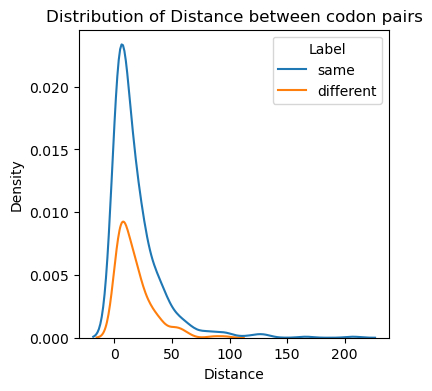

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

obs_df = df[df["Label"] != "missing"]
# Plot the distribution of the 'Label' column
plt.figure(figsize=(4,4))
sns.kdeplot(data=obs_df, x="Distance", hue="Label")
plt.title('Distribution of Distance between codon pairs')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()


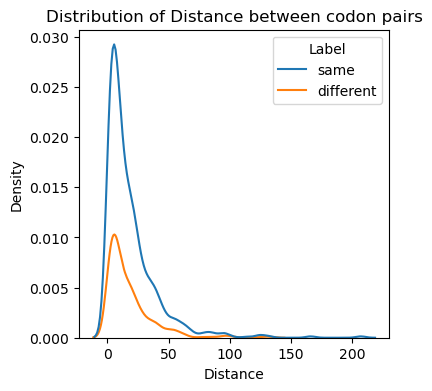

In [148]:
# Only analyze Ala, Arg, Gly, Ile, Leu, Pro, Ser, Thr, Val
# aa_list = ['A', 'R', 'G', 'I', 'L', 'P', 'S', 'T', 'V']
# codon-pair distance
# codon-pair category
# save-codon pair 
data = []
random_index = 0
for seqs in random_sequences:
    for i in range(len(amino_acid_seq)):
        current_aa = amino_acid_seq[i]
        current_codon = seqs[i*3:(i+1)*3]
        next_pos = amino_acid_seq.find(current_aa, i + 1)
        
        if next_pos != -1:
            next_codon = seqs[next_pos*3:(next_pos+1)*3]
        else:
            next_pos = float('nan')
            next_codon = 'missing'
        
        distance = next_pos - i
        
        if next_codon == 'missing':
            label = 'missing'
        else:
            if next_codon == current_codon:
                label = 'same'
                #print(current_codon,next_codon,distance)
            else:
                if current_codon not in (accepting_dict.keys()):
                    label = 'different'
                    #print(current_codon,next_codon,distance)
                else:
                    if next_codon in accepting_dict[current_codon]:
                        label = 'same'
                        #print(current_codon,next_codon,distance)
                    else:
                        label = 'different'
        
        data.append([str(current_codon), str(next_codon), distance, label, random_index])
    random_index += 1

# Create a DataFrame
df = pd.DataFrame(data, columns=["Current Codon", "Next Codon", "Distance", "Label", "RandomIndex"])

random_df = df[df["Label"] != "missing"]
# Plot the distribution of the 'Label' column
plt.figure(figsize=(4,4))
sns.kdeplot(data=random_df, x="Distance", hue="Label")
plt.title('Distribution of Distance between codon pairs')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()



In [149]:
random_df.tail(20)

,Current Codon,Next Codon,Distance,Label,RandomIndex
7914,AGA,AGA,13.0,same,9
7915,GAA,GAA,2.0,same,9
7916,TTT,TTC,16.0,different,9
7917,GAA,GAA,25.0,same,9
7919,TCG,AGT,2.0,different,9
7920,CTA,TTA,16.0,different,9
7921,AGT,TCT,16.0,different,9
7922,GTC,GTT,8.0,same,9
7923,GAT,GAC,5.0,different,9
7924,AAA,AAA,9.0,same,9


In [174]:
# 过滤 current_codon 为 'AGA' 的行
aga_df = random_df[random_df['Current Codon'] == 'CTT']

# 按 'RandomIndex' 和 'Label' 分组，统计每组 'same' 和 'different' 的数量
label_counts = aga_df.groupby(['RandomIndex', 'Label']).size().unstack(fill_value=0)

# 计算频率：每组中 same 和 different 的数量除以该组的总数
total_counts = aga_df.groupby('RandomIndex').size()
frequencies = label_counts.div(total_counts, axis=0)

# 将结果显示出来
frequencies.reset_index(inplace=True)
print(frequencies)


Label  RandomIndex  different      same
0                0   0.727273  0.272727
1                1   0.636364  0.363636
2                2   0.454545  0.545455
3                3   0.416667  0.583333
4                4   0.875000  0.125000
5                5   0.555556  0.444444
6                6   0.750000  0.250000
7                7   1.000000  0.000000
8                8   0.500000  0.500000
9                9   0.900000  0.100000


In [173]:
label_counts = obs_df[obs_df['Current Codon'] == 'CTT'].groupby('Label').size()

# 计算频率：每组中 same 和 different 的数量除以该组的总数
total_counts = obs_df[obs_df['Current Codon'] == 'CTT'].shape[0]
frequencies = pd.DataFrame(label_counts.div(total_counts, axis=0))

# 将结果显示出来
frequencies.reset_index(inplace=True)
print(frequencies)


       Label         0
0  different  0.666667
1       same  0.333333


In [170]:
obs_df[obs_df['Current Codon'] == 'AGA'].shape

(19, 4)